In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ALLREG.csv')
df.head()

,QB,SOUTH,AWAY,GAME,WEEK,AGE,PLAYER_EXP_Y,LAST_WEEK_DK_POINTS,LAST_6_WEEK_DK_POINTS,DK_POINTS
0,0,1,1,3,3,22.081,0,0.0,0.0,1.4
1,0,1,1,4,4,22.091,0,1.4,1.4,24.4
2,0,0,0,4,4,22.300,0,0.0,0.0,10.9
3,0,0,1,5,5,22.310,0,10.9,10.9,21.5
4,0,0,1,6,6,22.317,0,21.5,32.4,4.1


In [3]:
data = df

In [4]:
train_cols = data.columns[:-1]
mod = sm.OLS(data['DK_POINTS'], data[train_cols])
result = mod.fit()
print (result.summary())

                                 OLS Regression Results                                
Dep. Variable:              DK_POINTS   R-squared (uncentered):                   0.755
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              1582.
Date:                Fri, 04 Oct 2019   Prob (F-statistic):                        0.00
Time:                        13:48:09   Log-Likelihood:                         -16310.
No. Observations:                4628   AIC:                                  3.264e+04
Df Residuals:                    4619   BIC:                                  3.270e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [5]:
y = data['DK_POINTS']
X = data[data.columns[:-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


lm = LinearRegression()

lm.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

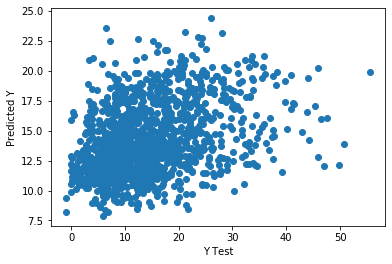

In [7]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [8]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.301180733511713
MSE: 66.96759058997907
RMSE: 8.18337281259867


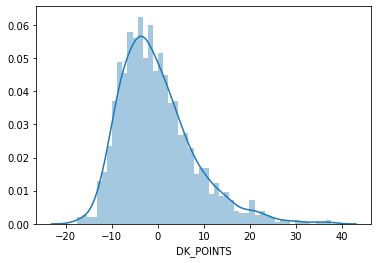

In [9]:
sns.distplot((y_test-predictions),bins=50);

In [10]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
QB,1.588924
SOUTH,0.318912
AWAY,-0.951316
GAME,-2.289435
WEEK,1.931541
AGE,-0.249591
PLAYER_EXP_Y,0.241348
LAST_WEEK_DK_POINTS,0.089588
LAST_6_WEEK_DK_POINTS,0.057005
